In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import os, sys
from matplotlib import cm
from matplotlib.patches import Circle,Wedge,Rectangle
%matplotlib inline

In [2]:
data=pd.read_excel(r"N:\Planning - New File Structure\Performance\RidershipAutomation.xlsx")
df=pd.DataFrame(data)

In [3]:
routes=pd.read_csv(r"N:\Planning - New File Structure\GIS\Data\GTFS\VRT5_10_18\routes.txt")

In [4]:
df_joined=pd.merge(df,routes)
route_color=df_joined[['Route','route_color']]
route_color.set_index('Route')

,route_color
Route,
1 Parkcenter,#ffcd00
10 Hill Road - Maple Grove,#fbb161
10X,#fbb161
11 Garden City,#ba0c2f
12 Maple Grove,#b6bd00
14 Hyde Park,#b58150
16 VA Shuttle,#934d11
17 Warm Springs,#00a9ce
18 Harris Ranch,#009639


In [5]:
df.set_index(['Stat','Service','Route','Area','route_id'],inplace=True)

In [6]:
df.columns=pd.to_datetime(df.columns)

In [7]:
UPT_FR_18=df.loc[['UPT','FR'],datetime.date(year=2017,month=10,day=1):datetime.date(year=2018,month=9,day=1)]
UPT_FR_17=df.loc[['UPT','FR'],datetime.date(year=2016,month=10,day=1):datetime.date(year=2017,month=9,day=1)]

In [8]:
UPT_FR_17_Total=UPT_FR_17.sum(axis=0).sum()
UPT_FR_18_Total=UPT_FR_18.sum(axis=0).sum()

In [9]:
YearOverYearRidership=(UPT_FR_18_Total-UPT_FR_17_Total).round(-2)
YearOverYearRidershipPct=int(((UPT_FR_18_Total/UPT_FR_17_Total)-1)*100)
YearOverYearRidershipPct

10

In [10]:
ring_data=pd.DataFrame([UPT_FR_18_Total,UPT_FR_17_Total]).T
ring_data.columns=['2018','2017']

In [11]:
def degree_range(n): 
    start = np.linspace(-90,90,n+1, endpoint=True)[0:-1]
    end = np.linspace(-90,90,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

In [12]:
def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [13]:
def gauge(labels=['LOW','MEDIUM','HIGH','VERY HIGH','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False,arrow_size=1,arrow_color='black'): 
    
    """
    some sanity checks first
    
    """
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, (0.225*(arrow_size/2)) * np.cos(np.radians(-pos)), 0.225 * np.sin(np.radians(-pos)), \
                 width=0.04*(arrow_size/2), head_width=0.09*(arrow_size/2), head_length=0.1*(arrow_size/2), color=arrow_color)
    
    ax.add_patch(Circle((0, 0), radius=0.02*(arrow_size/2), color=arrow_color))
    #ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

In [14]:
by_route18=df.loc[:,datetime.date(year=2017,month=10,day=1):datetime.date(year=2018,month=9,day=1)].groupby('Route').sum()
by_route17=df.loc[:,datetime.date(year=2016,month=10,day=1):datetime.date(year=2017,month=9,day=1)].groupby('Route').sum()

by_route18=by_route18.sum(axis=1)
by_route17=by_route17.sum(axis=1)

ring_data_routes=pd.DataFrame([by_route18,by_route17]).T
ring_data_routes.columns=['2018','2017']

In [15]:
ring_data_routes['PercentChange']=ring_data_routes['2018']/ring_data_routes['2017']
ring_data_routes['Change']=ring_data_routes['2018']-ring_data_routes['2017']
arrow_quints=pd.DataFrame(ring_data_routes.PercentChange.quantile([.2,.4,.6,.8]))

In [16]:
ring_data_routes['Arrow']=pd.qcut(ring_data_routes['PercentChange'],5,labels=[1,2,3,4,5])
ring_data_routes['Size']=pd.qcut(ring_data_routes['Change'],5,labels=[1,2,3,4,5])
ring_data_routes['Arrow']=ring_data_routes.Arrow.astype(float)
ring_data_routes['Size']=ring_data_routes.Size.astype(int)

In [17]:
arrow=ring_data_routes.iloc[:,4]
size=ring_data_routes.iloc[:,5]
needs=pd.DataFrame([arrow,size]).T

In [22]:
needs.Arrow=needs.Arrow.map(int)
needs.Size=needs.Size.map(int)
route_colors=['#ffcd00','#fbb161','#fbb161','#ba0c2f','#b6bd00','#b58150','#934d11','#00a9ce','#009639','#685bc7','#51284f','#009639','#ff8200','#05c3de','#aa8066','#ff5c39','#486b4c','#97d700','#bb29bb','#008c95','#8b0e04','#f8971d','#63619a','black','black','#40b170','#0072ce','#e93cac','#e93cac','#009ca6','#009ca6','#001489','#001489','#01286b','#00917b','#3a3b42','#CE5504']
needs['color']=route_colors

In [23]:
needs.reset_index(inplace=True)

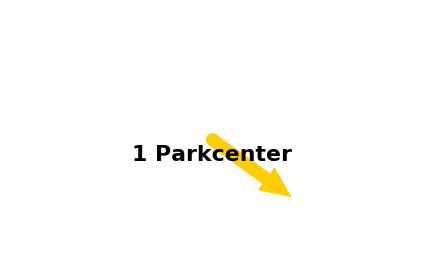

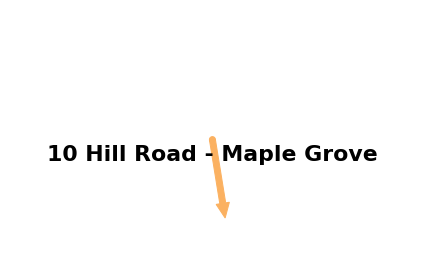

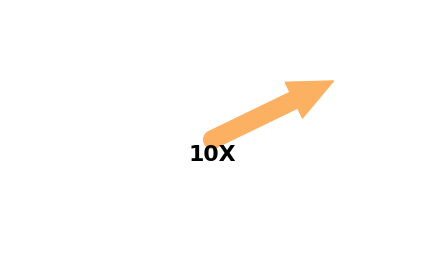

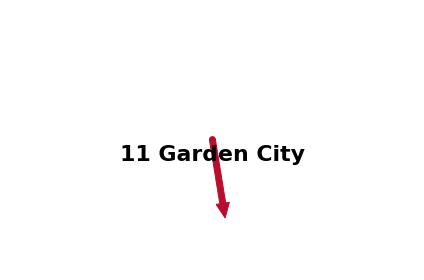

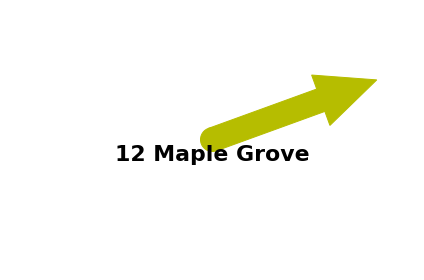

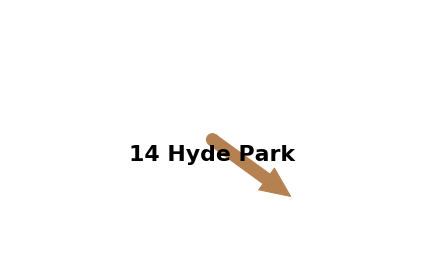

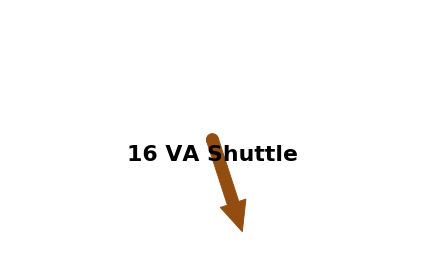

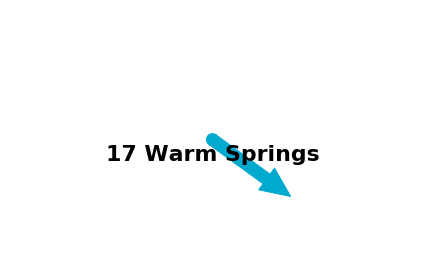

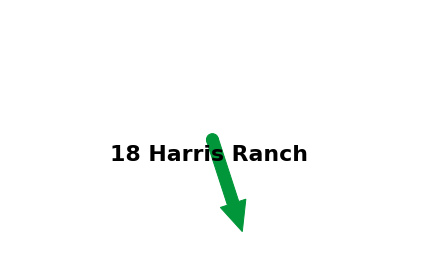

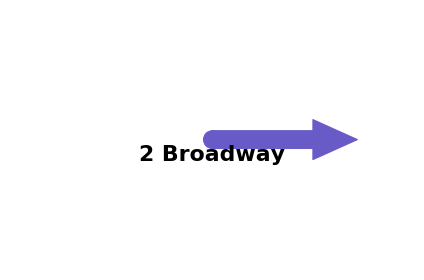

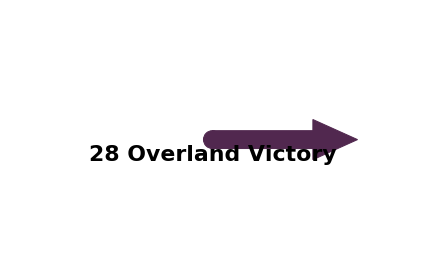

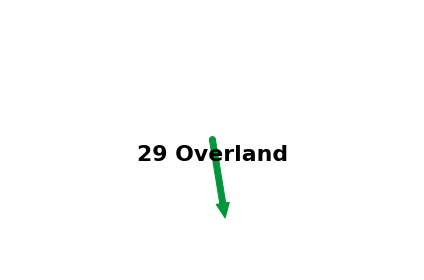

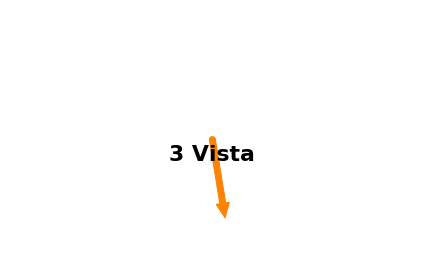

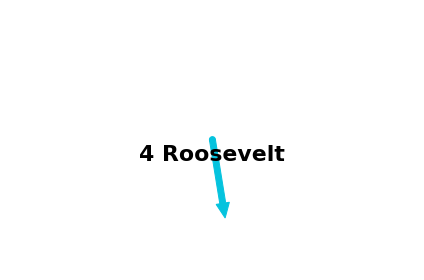

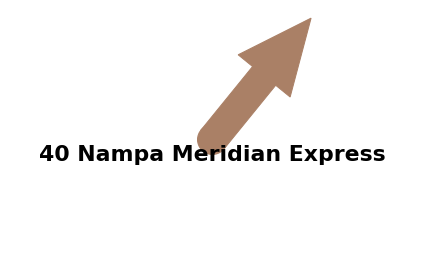

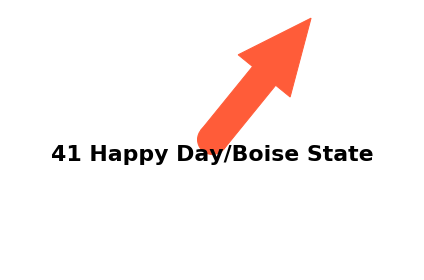

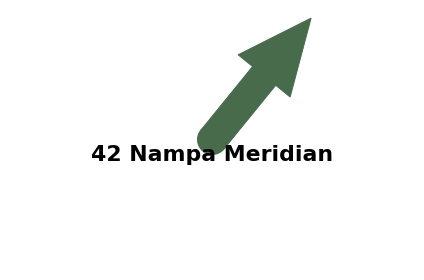

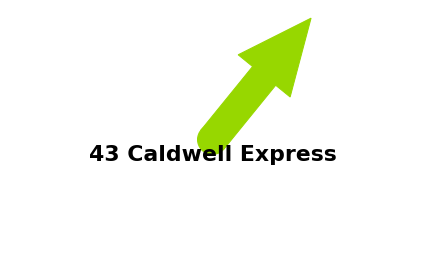

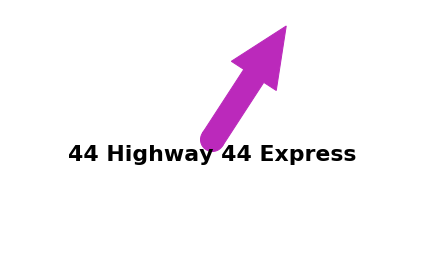

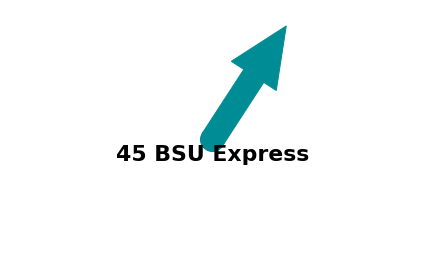

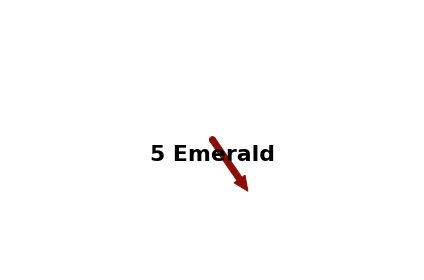

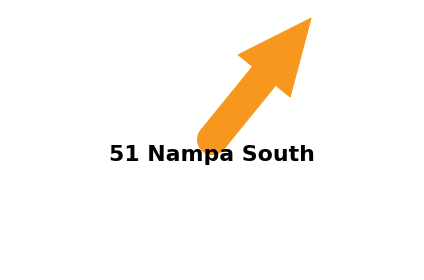

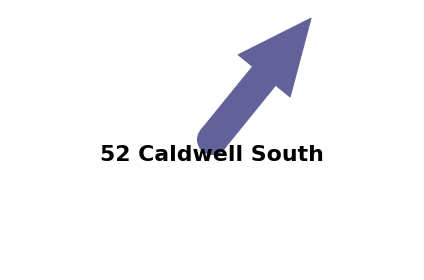

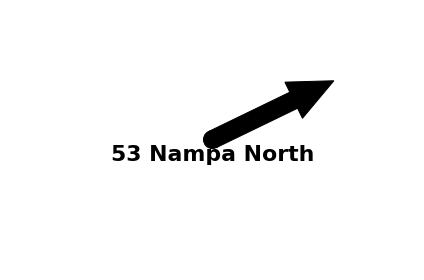

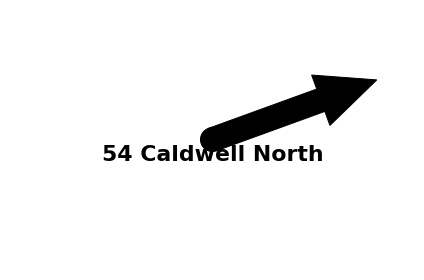

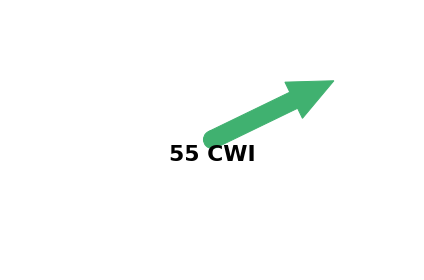

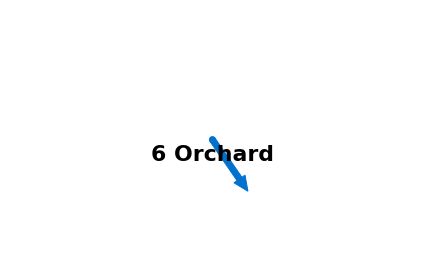

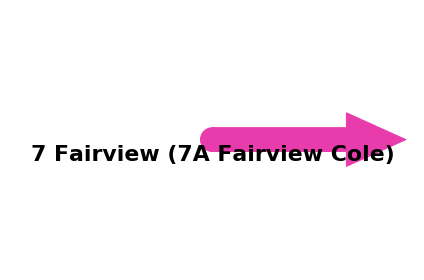

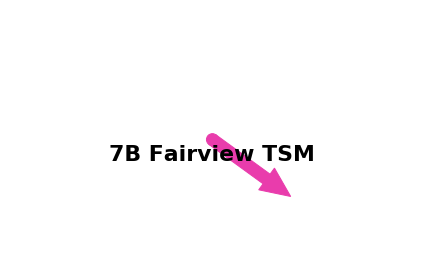

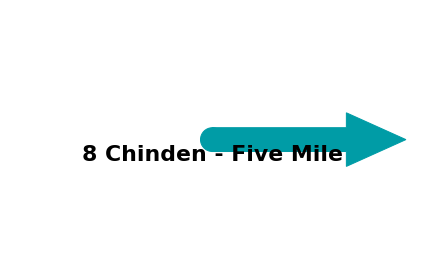

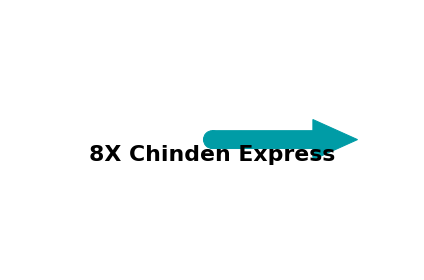

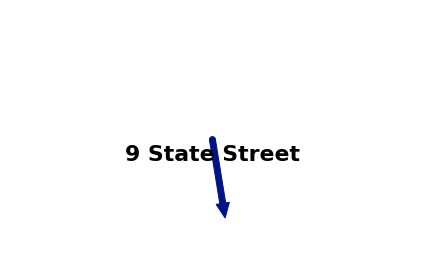

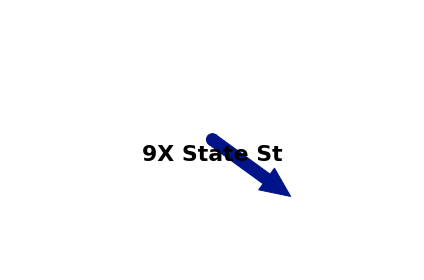

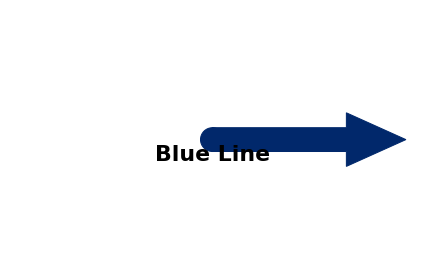

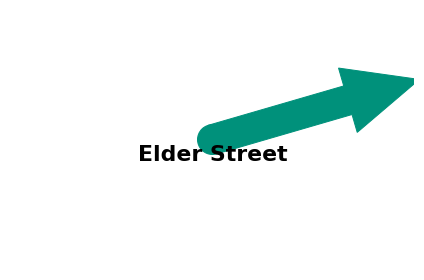

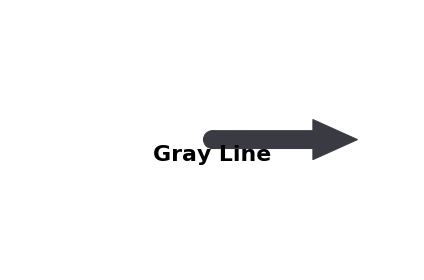

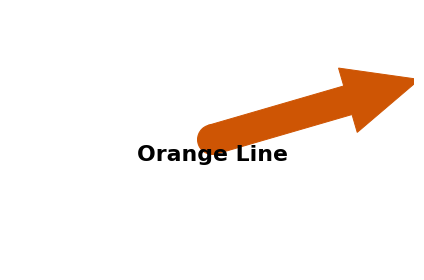

In [31]:
for index, row in needs.iterrows():
    gauge(title=row['Route'],labels=['','','','',''],colors=['#ffffff','#ffffff','#ffffff','#ffffff','#ffffff'],arrow=row['Arrow'],arrow_size=row['Size'],arrow_color=row['color'])